### Data Exploration of Cleaned Data

### Data Prep

In [1]:
import os
os.chdir('/Users/stephaniezhou/Desktop/DS/Music-Therapy-Recommendation-Engine')

In [2]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import data
csv_path = 'data/cleaned_mxmh_survey.csv'
df = pd.read_csv(csv_path, delimiter=';')
df.head(10)

,Timestamp,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumental,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety_Group,Depression_Group,Insomnia_Group,OCD_Group,Normalized_HoursPerDay,Normalized_BPM,Normalized_Anxiety,Normalized_Depression,Normalized_Insomnia,Normalized_OCD
0,8/28/2022 13:22:53,22.0,Pandora,1.0,No,Yes,No,Rock,Yes,No,...,High,Medium,No,Medium,0.05,0.05,0.40,0.35,0.00,0.25
1,8/28/2022 3:19:08,18.0,Spotify,2.0,Yes,No,No,Pop,No,Yes,...,Low,Low,High,Medium,0.10,0.10,0.15,0.15,0.40,0.30
2,8/28/2022 11:08:51,16.0,Spotify,1.0,Yes,No,No,Classical,No,No,...,No,No,No,No,0.05,0.05,0.00,0.00,0.00,0.00
3,8/28/2022 11:58:48,17.0,Spotify,3.0,Yes,No,No,Classical,Yes,Yes,...,Medium,Medium,High,Low,0.15,0.15,0.30,0.30,0.40,0.10
4,8/28/2022 13:34:00,15.0,Other streaming service,2.0,Yes,Yes,No,Rock,No,No,...,Low,Low,Medium,Medium,0.10,0.10,0.15,0.10,0.30,0.35
5,8/28/2022 12:08:29,18.0,Spotify,4.0,Yes,No,No,Metal,Yes,Yes,...,No,No,High,Low,0.20,0.20,0.05,0.00,0.40,0.10
6,8/28/2022 11:13:25,18.0,Spotify,5.0,Yes,Yes,No,Pop,Yes,No,...,Low,Low,No,No,0.25,0.25,0.15,0.10,0.05,0.05
7,8/28/2022 4:13:11,16.0,Other streaming service,3.0,Yes,Yes,Yes,Rock,Yes,Yes,...,High,Medium,High,High,0.15,0.15,0.50,0.30,0.40,0.50
8,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Low,Low,Medium,No,0.05,0.05,0.10,0.10,0.25,0.05
9,8/28/2022 12:12:35,17.0,I do not use a streaming service.,1.0,Yes,Yes,Yes,Folk,No,No,...,Medium,Low,No,Medium,0.05,0.05,0.35,0.15,0.05,0.25


### Correlation between the Four Mental Health Levels

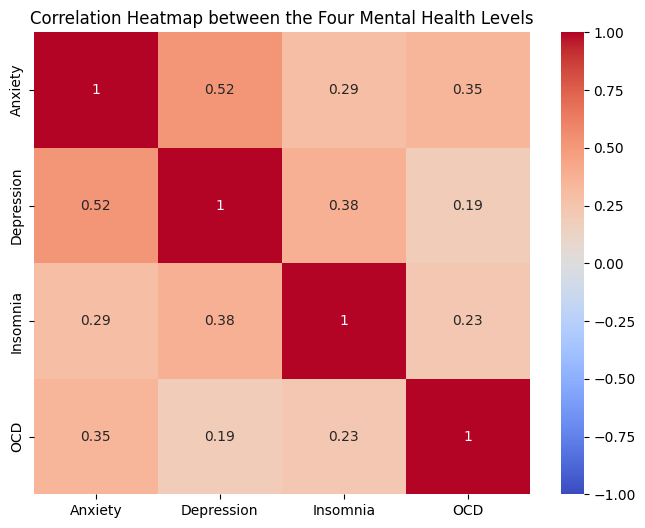

In [31]:
# Create a matrix with the four mental health columns
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
matrix = df[mental_health_columns].corr()

# Create the figure
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between the Four Mental Health Levels')
plt.show()

From the heatmap, we can tell that anxiety and depression have a moderate correlation with a value of 0.52. 

### Distribution of Favorite Genres of Respondants

In [33]:
# Count the number of respondants for each favorite genre
genre_counts = df['Fav_genre'].value_counts()

genre_counts

Fav_genre
Rock                187
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Jazz                 20
Rap                  20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

#### A bar chart showing favorite genre of respondants

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/1607734888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


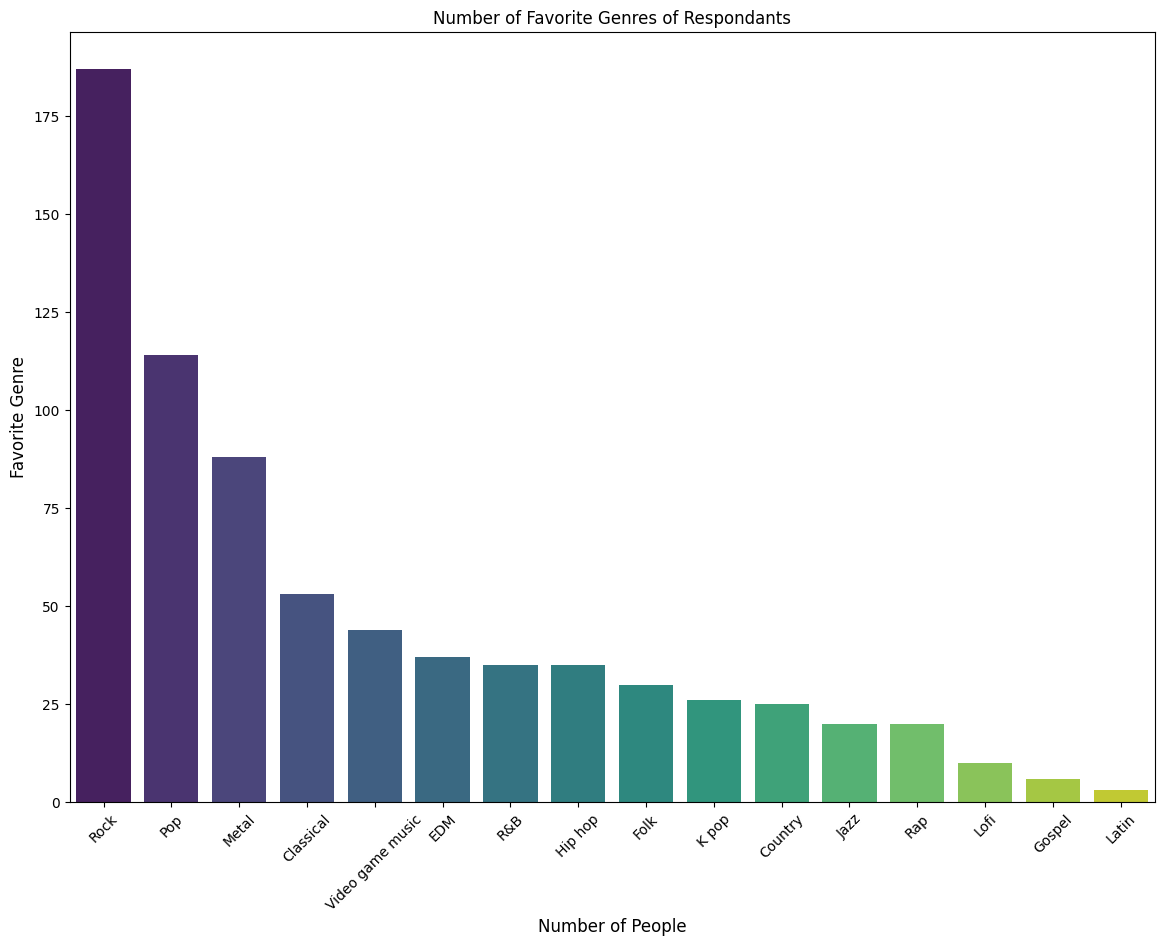

In [38]:
plt.figure(figsize=(14, 10))

# Create the bar plot using seaborn
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")

plt.title('Number of Favorite Genres of Respondants')
plt.xticks(rotation=45)
plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Favorite Genre', fontsize=12)

plt.show()

From the bar chart, rock music, pop, and metal genres have the highest number of frequency music genres across the Respondants; in contrast, lofi, gospel, and latin are the least popular ones.

#### A Stacked Bar Chart Showing the Distribution of Listening Frequencies of Genres

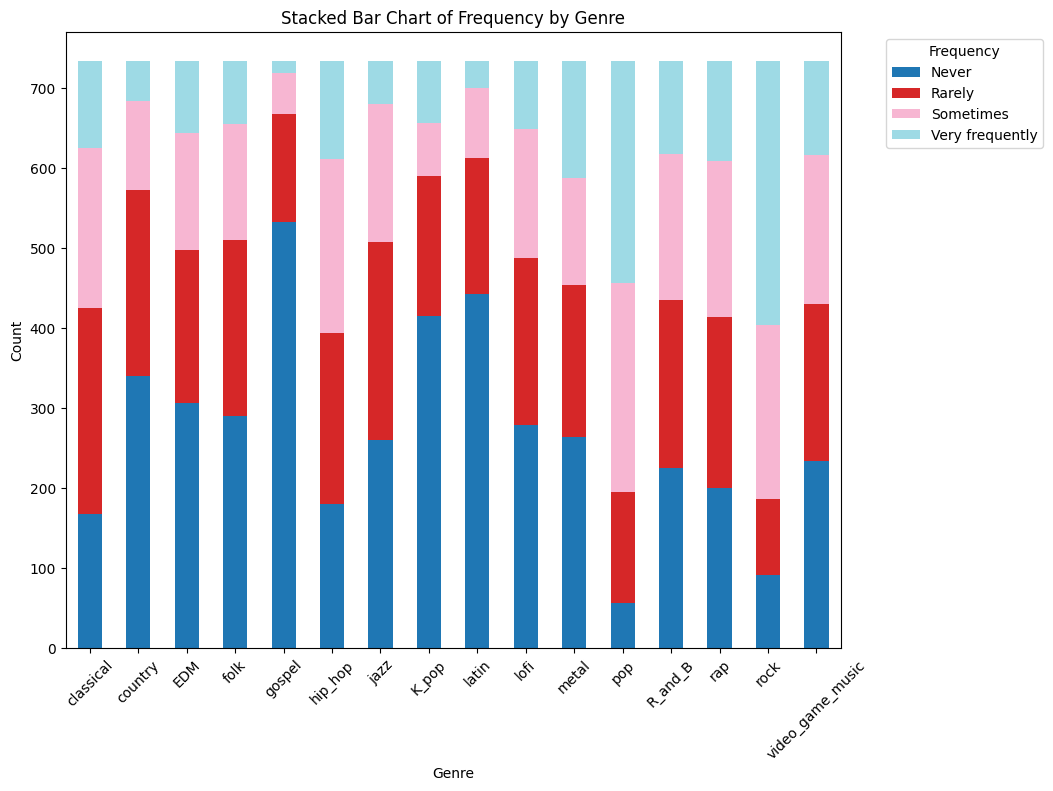

In [41]:
# Retrieve a list of columns that have 'Frequency_' in the name
frequency_col = []
for col in df.columns:
    if col.startswith('Frequency_'):
        frequency_col.append(col)

# Melt the DataFrame to have all frequency data in a single column
df_melted = pd.melt(df, value_vars=frequency_col, var_name='Genre', value_name='Frequency')

# Create a list that stores each genre's frequency counts
df_frequency_list = []

for genre in frequency_col:
    counts = df[genre].value_counts()
    sorted_counts = counts.sort_index()
    df_frequency_list.append(sorted_counts)

df_frequency = pd.concat(df_frequency_list, axis=1)
df_frequency = df_frequency.T

# Assign genre names
df_frequency.index = [col.replace('Frequency_', '') for col in frequency_col]

# Create a stacked bar chart
df_frequency.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Frequency by Genre')
plt.xticks(rotation=45)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


From the stacked bar chart, we can find that gospel, latin, and kpop report the most number of "Never" responses in the frequency questions, while pop and rock have the most responses of "Very frequently". This aligns with our findings from the descending bar chart.

### Relationship between Genres and Music Effects

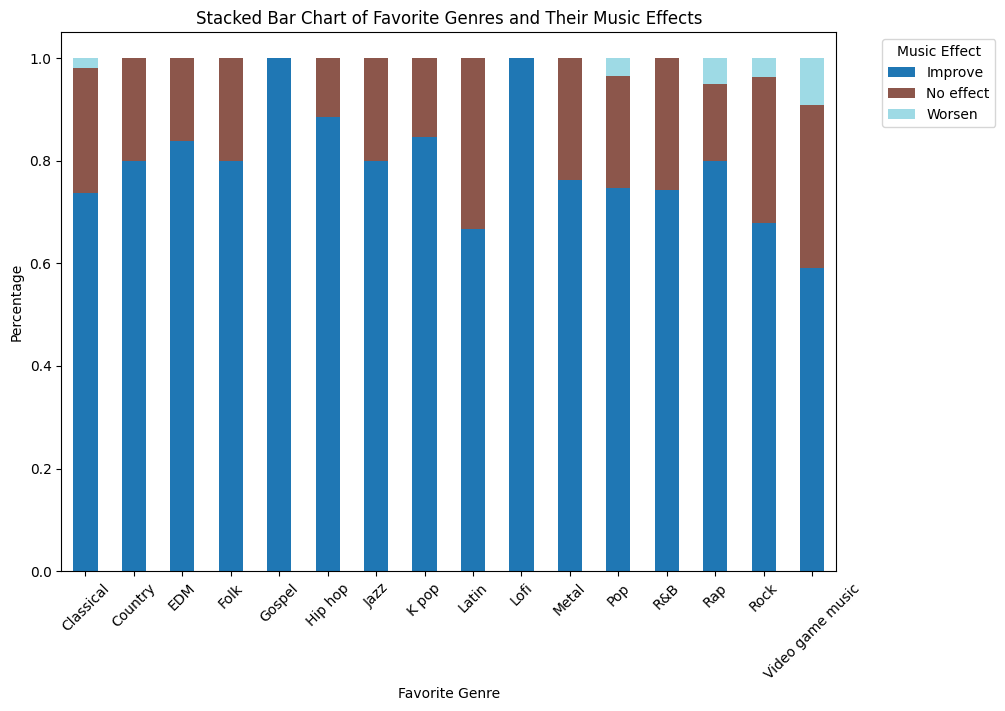

In [42]:
# Create a crosstab to count occurrences of each group of Fav Genre and Music Effect
crosstab = pd.crosstab(df['Fav_genre'], df['Music_effect'], normalize='index')

# Create a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')

plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Favorite Genres and Their Music Effects')
plt.xticks(rotation=45)
plt.legend(title='Music Effect', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [44]:
# Calculate the percentages of Respondants who answered 'improve' for each favorite genre
improve_percentages = {}

unique_val = df['Fav_genre'].unique()

for genre in unique_val:
    genre_df = df[df['Fav_genre'] == genre]
    
    improve_count = len(genre_df[genre_df['Music_effect'] == 'Improve'])
    
    if len(genre_df) > 0:
        improve_percentage = (improve_count / len(genre_df)) * 100
    else:
        improve_percentage = 0

    improve_percentages[genre] = improve_percentage

# Sort the percentages in descending order
sorted_improve_percentages = sorted(improve_percentages.items(), key=lambda x: x[1], reverse=True)

print("Percentage of respondents who answered 'Improve' by favorite genre:")
for genre, percentage in sorted_improve_percentages:
    print(f"{genre}: {percentage:.2f}%")


Percentage of respondents who answered 'Improve' by favorite genre:
Lofi: 100.00%
Gospel: 100.00%
Hip hop: 88.57%
K pop: 84.62%
EDM: 83.78%
Folk: 80.00%
Jazz: 80.00%
Country: 80.00%
Rap: 80.00%
Metal: 76.14%
Pop: 74.56%
R&B: 74.29%
Classical: 73.58%
Rock: 67.91%
Latin: 66.67%
Video game music: 59.09%


From the stacked bar chart and the list printed above, we find that Respondants who reported a higher percentage of improvements in mental health tend to listen to gospel, lofi, hip hop, k-pop, EDM, country, folk, jazz, and rap music. By comparison, Respondants whose favorite genres are rock, latin, and video game music reported lower improvements in mental health.

Thus, the music recommendation engine will probably focus on recommending music genres targeted at genres that alleviated mental health. However, more exploration and analysis are needed for a more accurate result.


### Relationship between BPM and Music Effects
Classification of BPM Levels:

|Classification|BPM|Examples|
|---|---|---|
|Very Slow|Below 60|Funeral dirges, some ambient music, extremely slow classicaly pieces|
|Slow|60-80|Ballads, slow waltzes, some jazz standards|
|Moderate|80-110|Pop songs, rock ballads, folk tunes, many jazz tunes|
|Moderately Fast|110-140|Upbeat pop songs, rock songs, some EDM tracks, faster jazz standards|
|Fast|140-170|Dance music, techno, punk, some rock and pop songs with high energy|
|Very Fast|Above 170|Speed metal, hardcore techno, drum and bass, some extreme forms of electronic music|

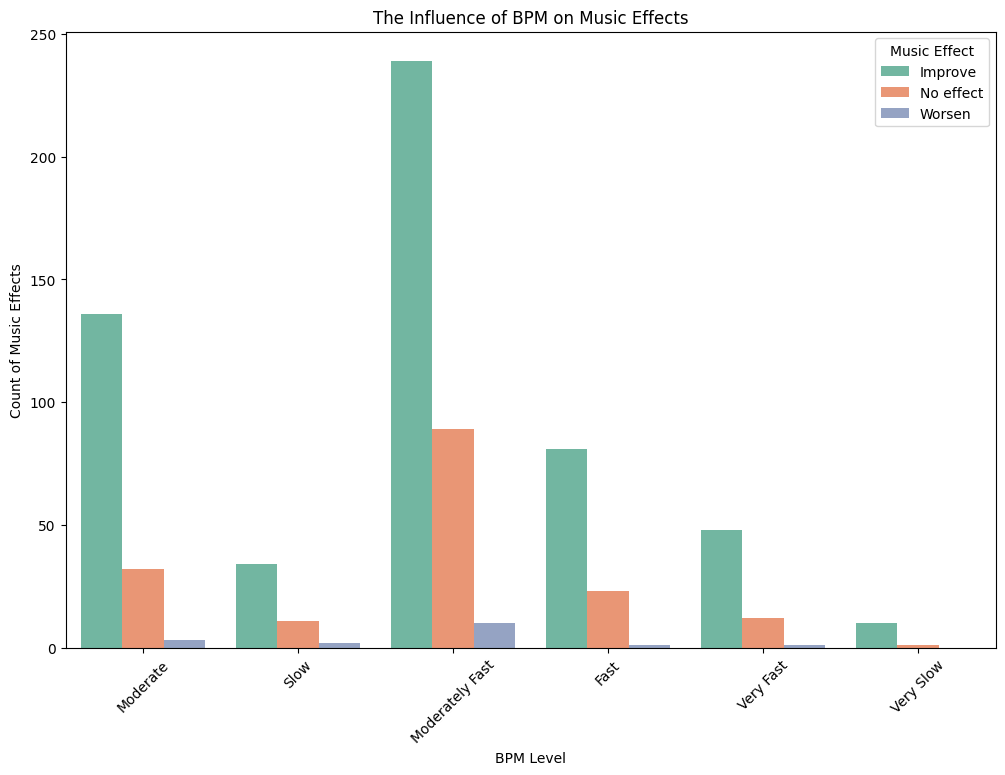

In [45]:
# Categorize BPM based on the classification chart above
def categorize_bpm(bpm):
    if bpm < 60:
        return 'Very Slow'
    elif 60 <= bpm <= 80:
        return 'Slow'
    elif 80 < bpm <= 110:
        return 'Moderate'
    elif 110 < bpm <= 140:
        return 'Moderately Fast'
    elif 140 < bpm <= 170:
        return 'Fast'
    else:
        return 'Very Fast'

# Create a new dataframe that contains the categorized BPM levels
df['BPM_category'] = df['BPM'].apply(categorize_bpm)

# Create a bar chart showing the influence of BPM on Music Effects
plt.figure(figsize=(12, 8))
sns.countplot(x='BPM_category', hue='Music_effect', data=df, palette='Set2')

plt.xlabel('BPM Level')
plt.ylabel('Count of Music Effects')
plt.title('The Influence of BPM on Music Effects')
plt.xticks(rotation=45)
plt.legend(title='Music Effect')
plt.show()


Based on the bar chart, all types of BPM levels show improvements in Respondants' mental health. Thus, there is no significant relationship between BPM levels and the effects of music.

#### Age Group Analysis

There's an outlier in BPM.

In [12]:
print(df['BPM'].describe())


count    7.330000e+02
mean     1.364379e+06
std      3.693584e+07
min      0.000000e+00
25%      1.050000e+02
50%      1.200000e+02
75%      1.400000e+02
max      1.000000e+09
Name: BPM, dtype: float64


In [46]:
# Print out the rows where BPM is greater than 300
outliers = df[df['BPM'] > 300]
print(outliers)


             Timestamp   Age Primary_streaming_service  Hours_per_day  \
474  9/4/2022 15:41:59  16.0                   Spotify            7.0   
610  9/13/2022 1:55:43  16.0   Other streaming service            4.0   

    While_working Instrumental Composer         Fav_genre Exploratory  \
474           Yes           No       No  Video game music         Yes   
610           Yes           No       No               EDM         Yes   

    Foreign_languages  ...  Depression_Group Insomnia_Group OCD_Group  \
474                No  ...              High           High       Low   
610               Yes  ...            Medium             No       Low   

    Normalized_HoursPerDay Normalized_BPM Normalized_Anxiety  \
474                   0.35           0.35                0.2   
610                   0.20           0.20                0.2   

    Normalized_Depression Normalized_Insomnia Normalized_OCD BPM_category  
474                  0.40                0.40           0.20    Very Fa

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/176074877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age_Group'] = pd.Categorical(df_filtered['Age_Group'], categories=age_order, ordered=True)
/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/176074877.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='BPM', data=df_filtered, palette='Set3')


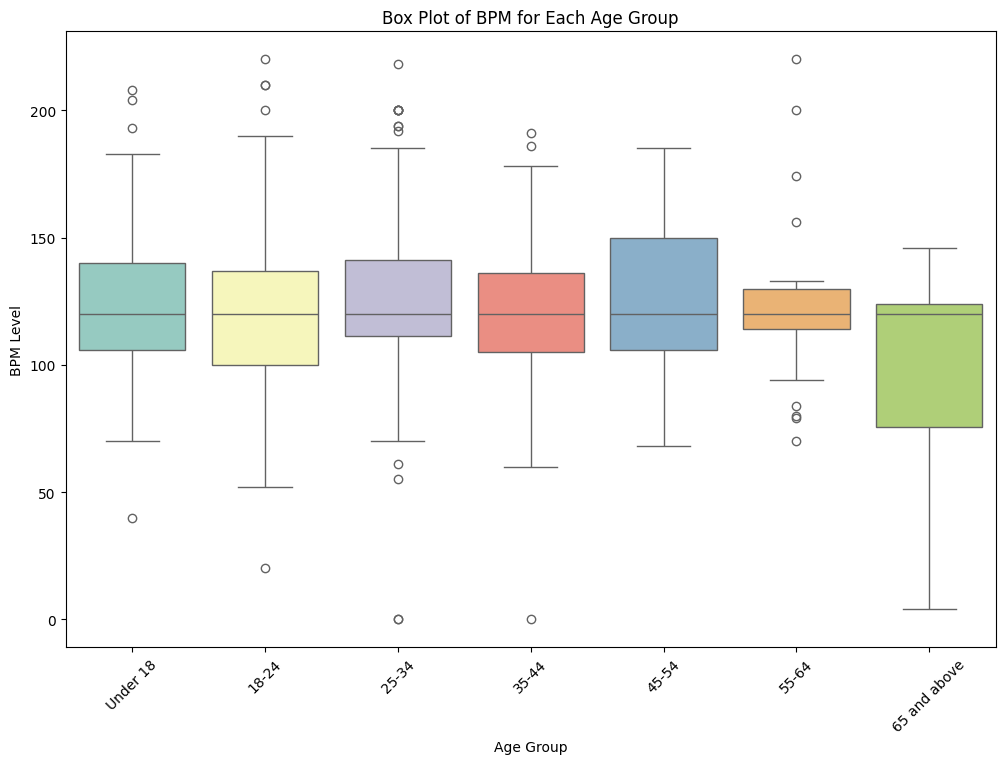

In [14]:
# Filter out extreme BPM values
df_filtered = df[df['BPM'] < 300]

age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and above']
df_filtered['Age_Group'] = pd.Categorical(df_filtered['Age_Group'], categories=age_order, ordered=True)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age_Group', y='BPM', data=df_filtered, palette='Set3')
plt.xlabel('Age Group')
plt.ylabel('BPM Level')
plt.title('Box Plot of BPM for Each Age Group')
plt.xticks(rotation=45)
plt.show()


The boxplots illustrated that there are no significant differences in BPM levels among age groups from tennagers to the 40's and 50's. However, individuals who are in their middle 50's to 60's perfer moderate to moderately fast BPM levels, and Respondants who are 65 and above tend to listen to music with lower BPM levels.

### Correlation between Mental Health Levels and Favorite Genres

#### Anxiety

##### Bar Chart of Average Anxiety Levels by Favorite Genre

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/2167412127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_anxiety.index, y=avg_anxiety.values, palette='viridis')


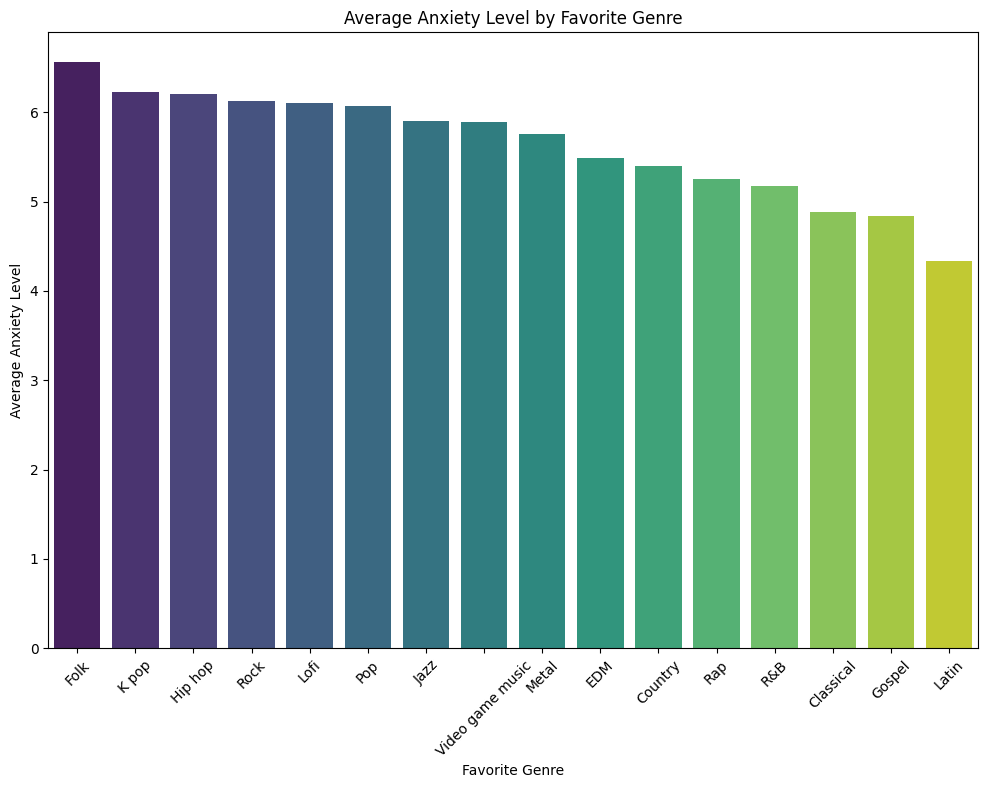

In [15]:
# Calculate the average anxiety level for each genre
avg_anxiety = df.groupby('Fav_genre')['Anxiety'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_anxiety.index, y=avg_anxiety.values, palette='viridis')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Anxiety Level')
plt.title('Average Anxiety Level by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

##### Stacked Bar Chart of Anxiety Groups by Favorite Genre

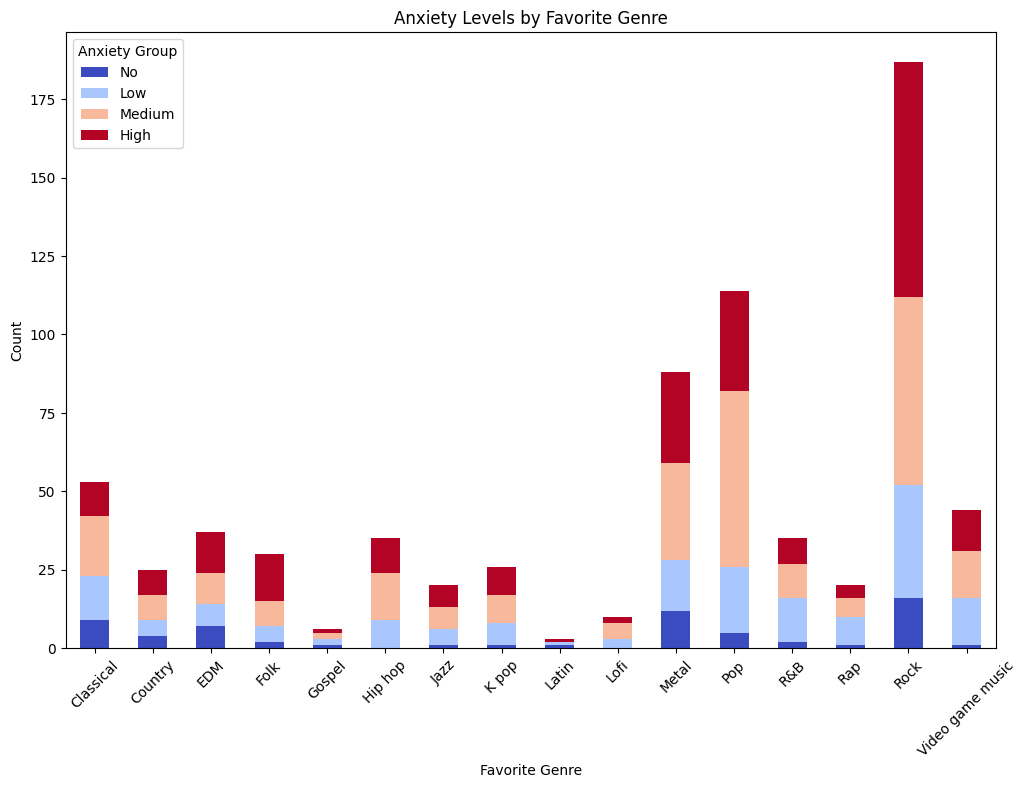

In [50]:
# Calculate the counts of Anxiety_Group for each favorite genre
anxiety_group_counts = df.groupby(['Fav_genre', 'Anxiety_Group']).size().unstack()

# Create a stacked bar chart
anxiety_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.title('Anxiety Levels by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Anxiety Group')
plt.show()

##### Stacked Bar Chart of Anxiety Group Percentage by Favorite Genre

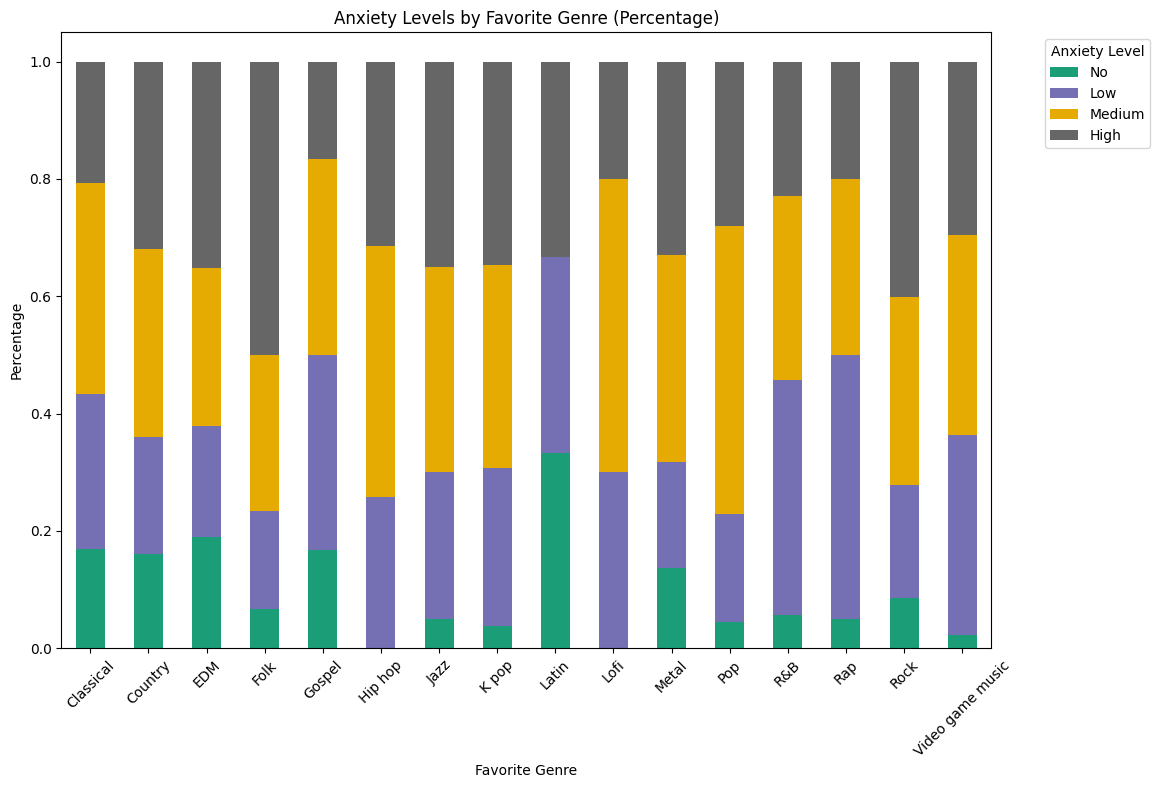

In [54]:
# Set an order for the Anxiety Groups
anxiety_order = ['No', 'Low', 'Medium', 'High']
df['Anxiety_Group'] = pd.Categorical(df['Anxiety_Group'], categories=anxiety_order, ordered=True)

# Calculate the percentages of each Anxiety Group
anxiety_percentages = df.groupby('Fav_genre')['Anxiety_Group'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
anxiety_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Dark2')

plt.title('Anxiety Levels by Favorite Genre (Percentage)')
plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Anxiety Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Based on the charts created, Respondants whose favorite genres Folk, K pop, hip hop, and Rock have a higher anxiety level on average, while Latin, Gospel, and Classical seem to give a lower anxiety level.

This is also shown in the stacked bar chart of Anxiety Levels by Favorite Genres in Percentage. Latin, Rap, Gospel, and Classical have the highest percentage of "No" and "Low" anxiety levels.

#### Depression

##### Bar Chart of Average Anxiety Levels by Favorite Genre

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/3193640492.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_depression.index, y=avg_depression.values, palette='coolwarm')


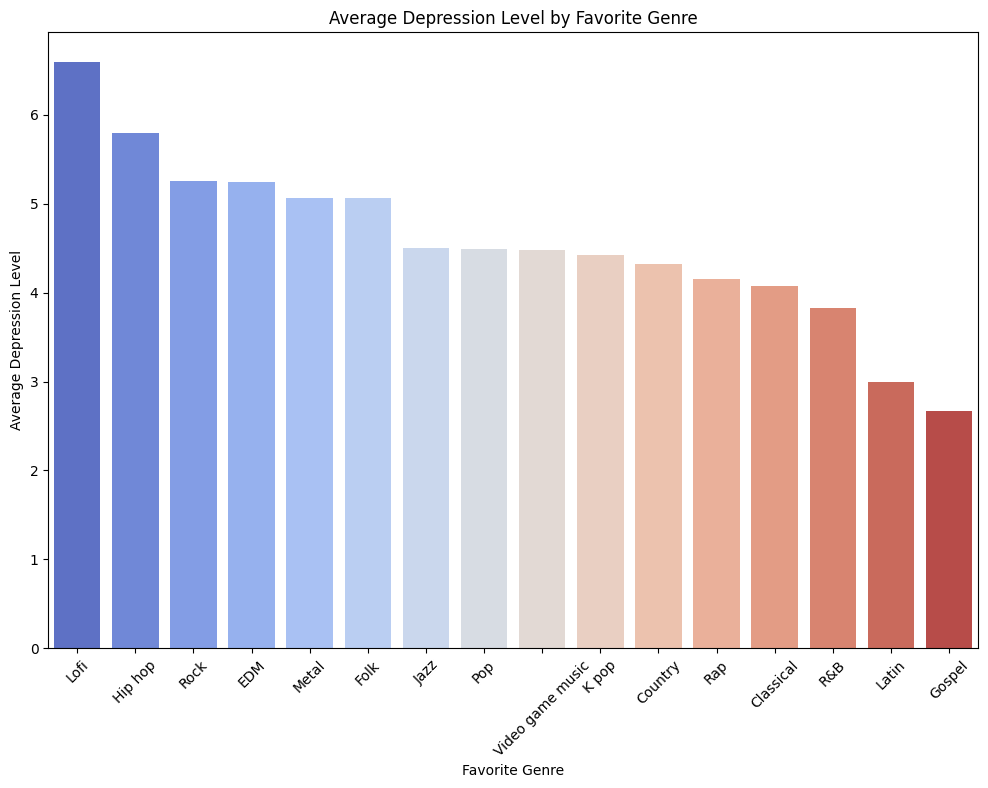

In [18]:
# Calculate the average anxiety level for each genre
avg_depression = df.groupby('Fav_genre')['Depression'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_depression.index, y=avg_depression.values, palette='coolwarm')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Depression Level')
plt.title('Average Depression Level by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

##### Stacked Bar Chart of Depression Groups by Favorite Genre

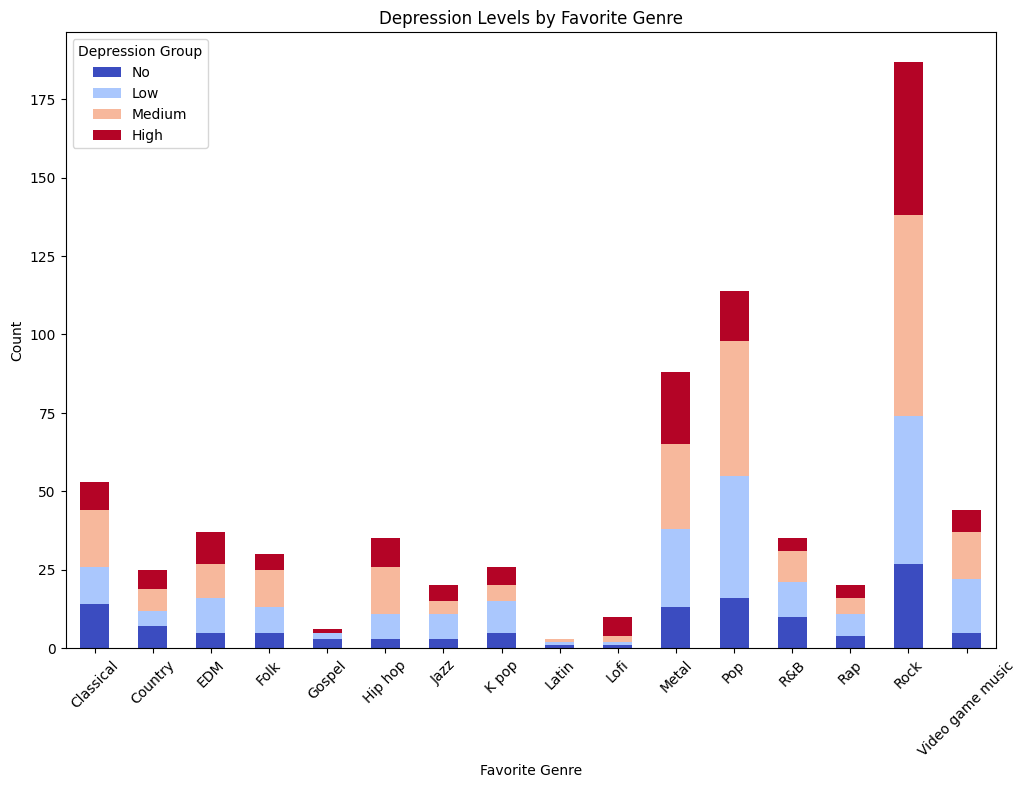

In [55]:
# Calculate the counts of Depression_Group for each favorite genre
depression_group_counts = df.groupby(['Fav_genre', 'Depression_Group']).size().unstack()

# Create a stacked bar chart
depression_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.title('Depression Levels by Favorite Genre')
plt.xticks(rotation=45)
plt.legend(title='Depression Group')
plt.show()

##### Stacked Bar Chart of Depression Group Percentage by Favorite Genre

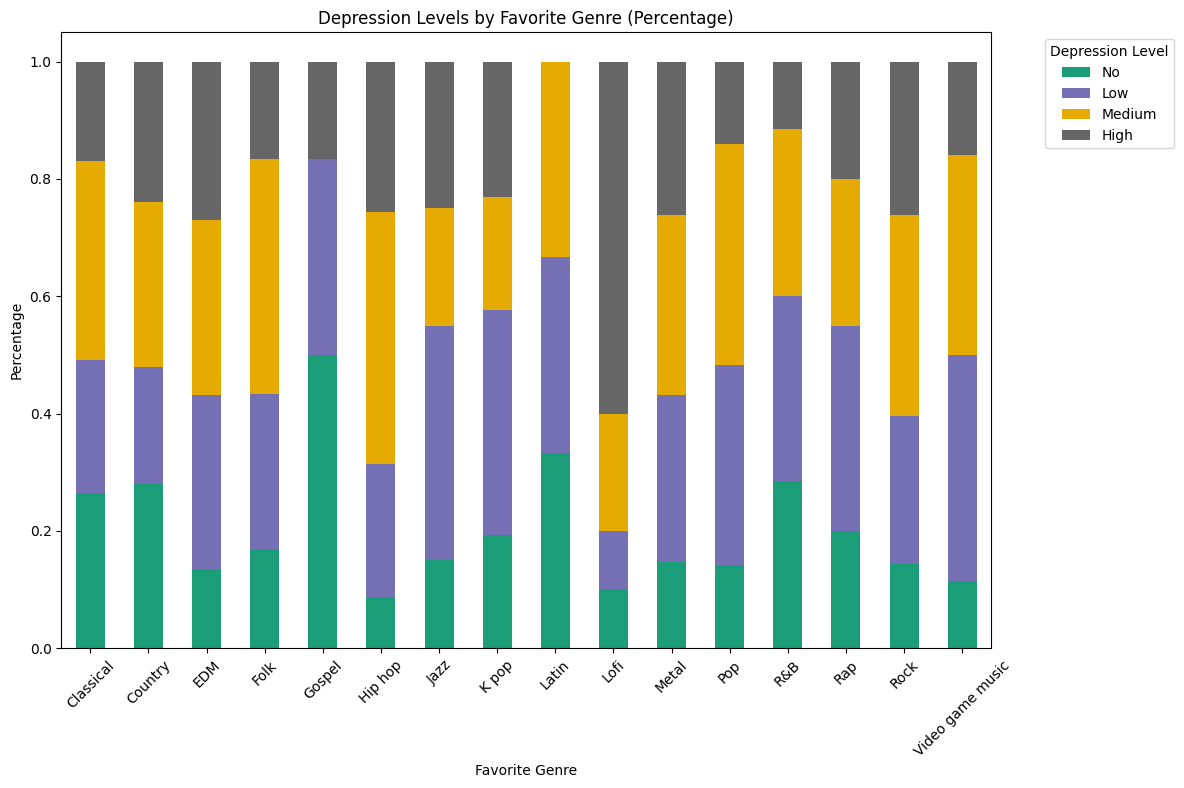

In [56]:
# Set an order for the Depression Groups
depression_order = ['No', 'Low', 'Medium', 'High']
df['Depression_Group'] = pd.Categorical(df['Depression_Group'], categories=depression_order, ordered=True)

# Calculate the percentages of each Depression Group
depression_percentages = df.groupby('Fav_genre')['Depression_Group'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
depression_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Dark2')

plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.title('Depression Levels by Favorite Genre (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='Depression Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

For depression levels, Lofi and Hip hop have the highest average depression levels among Respondants, while Latin and Gospel again have the lowest average depression level. R&B, Classical, and Rap also have a relatively lower depression level as well.

However, from the stacked bar chart, it seems Jazz and K pop have more people with No to Low depression level than Classical.

#### Insomnia

##### Bar Chart of Average Insomnia Levels by Favorite Genre

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/2254954401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_insomnia.index, y=avg_insomnia.values, palette='plasma')


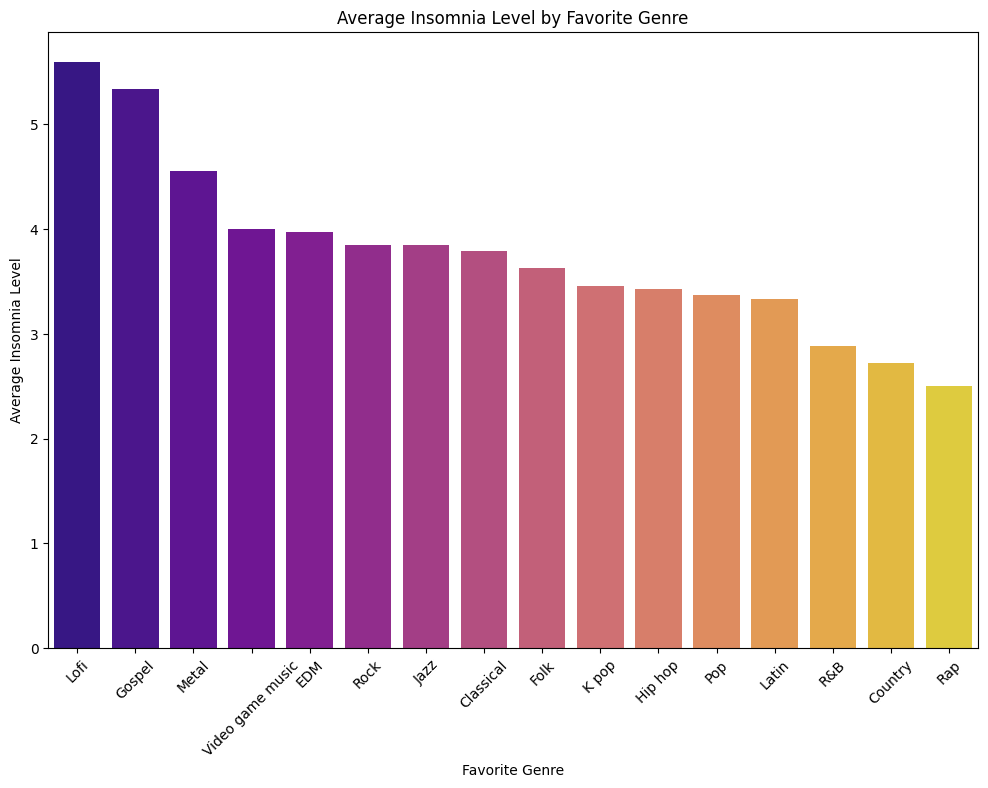

In [21]:
# Calculate the average insomnia level for each genre
avg_insomnia = df.groupby('Fav_genre')['Insomnia'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_insomnia.index, y=avg_insomnia.values, palette='plasma')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Insomnia Level')
plt.title('Average Insomnia Level by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

##### Stacked Bar Chart of Insomnia Groups by Favorite Genre

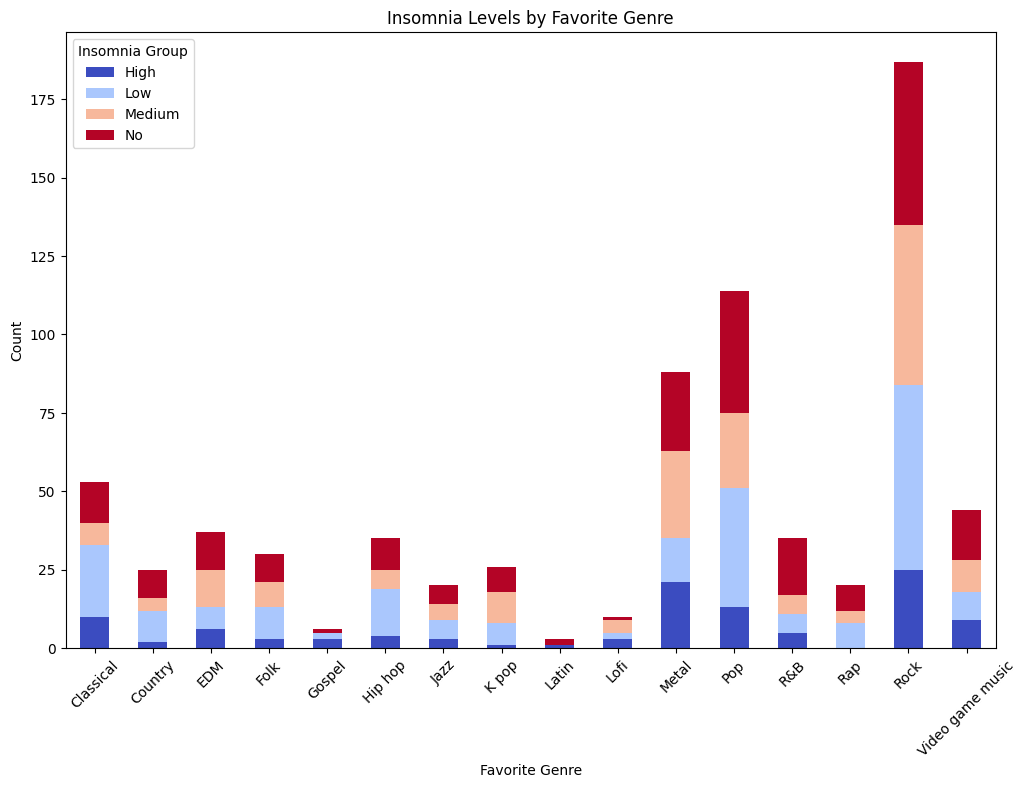

In [22]:
# Calculate the counts of Insomnia_Group for each favorite genre
insomnia_group_counts = df.groupby(['Fav_genre', 'Insomnia_Group']).size().unstack()

# Create a stacked bar chart
insomnia_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.title('Insomnia Levels by Favorite Genre')
plt.xticks(rotation=45)
plt.legend(title='Insomnia Group')
plt.show()

##### Stacked Bar Chart of Insomnia Group Percentage by Favorite Genre

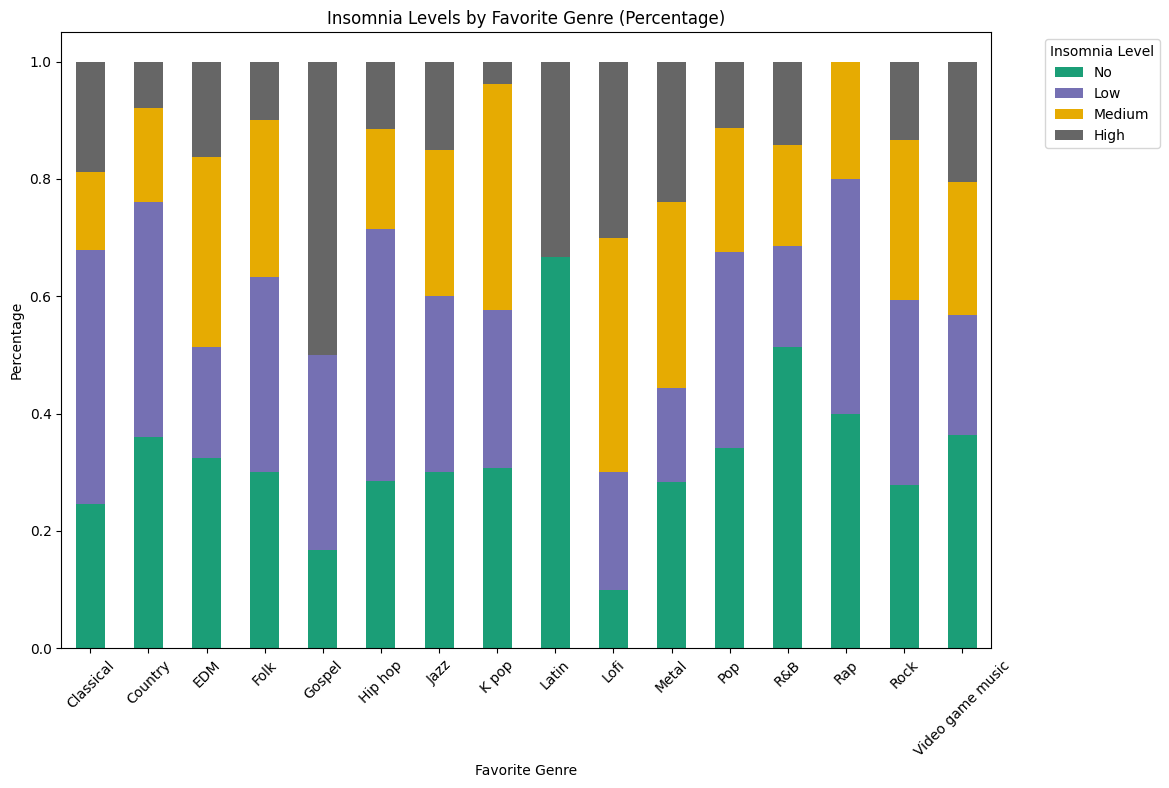

In [23]:
# Set an order for the Insomnia Groups
insomnia_order = ['No', 'Low', 'Medium', 'High']
df['Insomnia_Group'] = pd.Categorical(df['Insomnia_Group'], categories=insomnia_order, ordered=True)

# Calculate the percentages of each Insomnia Group
insomnia_percentages = df.groupby('Fav_genre')['Insomnia_Group'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
insomnia_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Dark2')

plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.title('Insomnia Levels by Favorite Genre (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='Insomnia Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lofi once again has one of the highest average insomnia level, followed by surprisingly, Gospel and Metal. Latin, R&B, Country, and Rap have the lowest insomnia levels.

From the percentage bar chart, we can tell that the influence of favorite genre to insomnia levels are very two-ended. Lofi, Gospel, and Metal have a large number of Respondants with High insomnia levels. However, this might be due to few Respondants have Lofi and Gospel as their favorite genres, so the result might be biased.

#### OCD

##### Bar Chart of OCD  Levels by Favorite Genre

/var/folders/qb/y5l8b_4j2dl8j_ml0rqp062w0000gn/T/ipykernel_883/1120939646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_OCD.index, y=avg_OCD.values, palette='cividis')


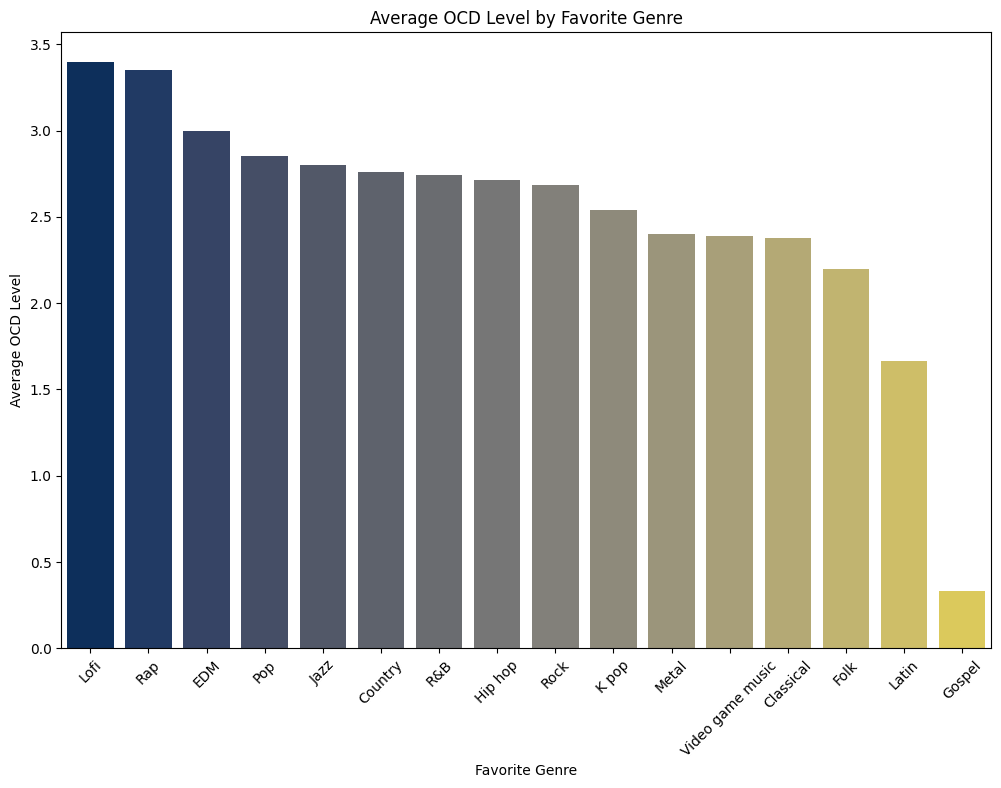

In [24]:
# Calculate the average OCD level for each genre
avg_OCD = df.groupby('Fav_genre')['OCD'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_OCD.index, y=avg_OCD.values, palette='cividis')
plt.xlabel('Favorite Genre')
plt.ylabel('Average OCD Level')
plt.title('Average OCD Level by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

##### Stacked Bar Chart of OCD Groups by Favorite Genre

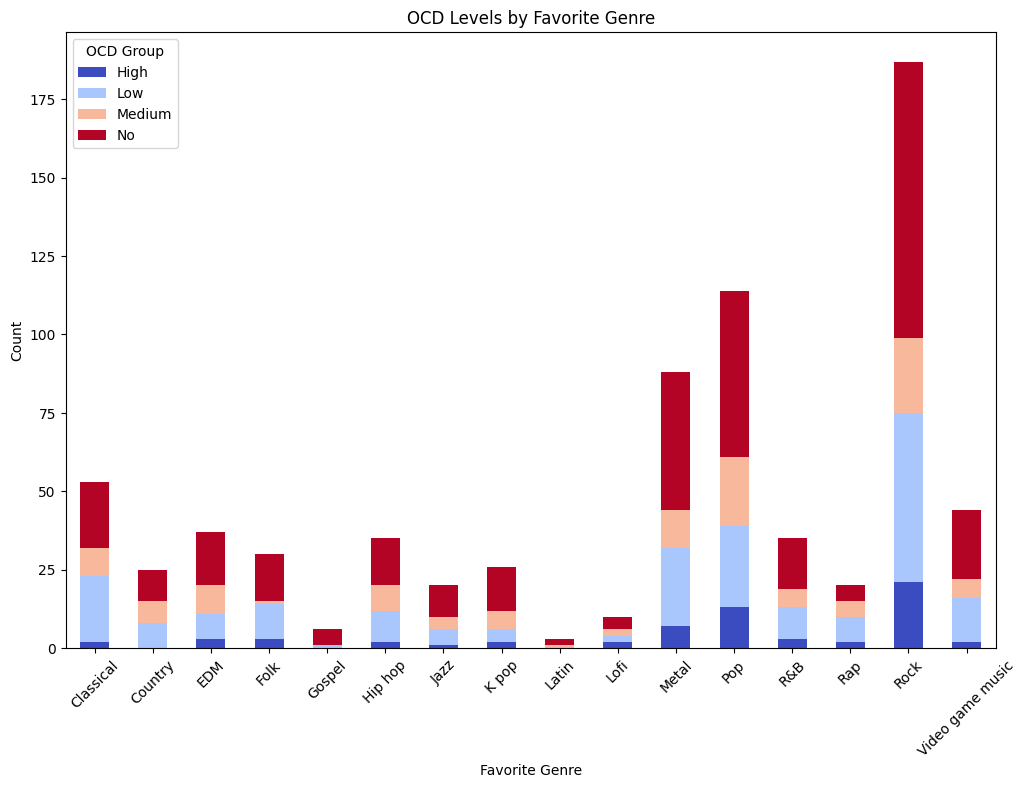

In [25]:
# Calculate the counts of OCD_Group for each favorite genre
OCD_group_counts = df.groupby(['Fav_genre', 'OCD_Group']).size().unstack()

# Create a stacked bar chart
OCD_group_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')

plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.title('OCD Levels by Favorite Genre')
plt.xticks(rotation=45)
plt.legend(title='OCD Group')
plt.show()

##### Stacked Bar Chart of OCD Group Percentage by Favorite Genre

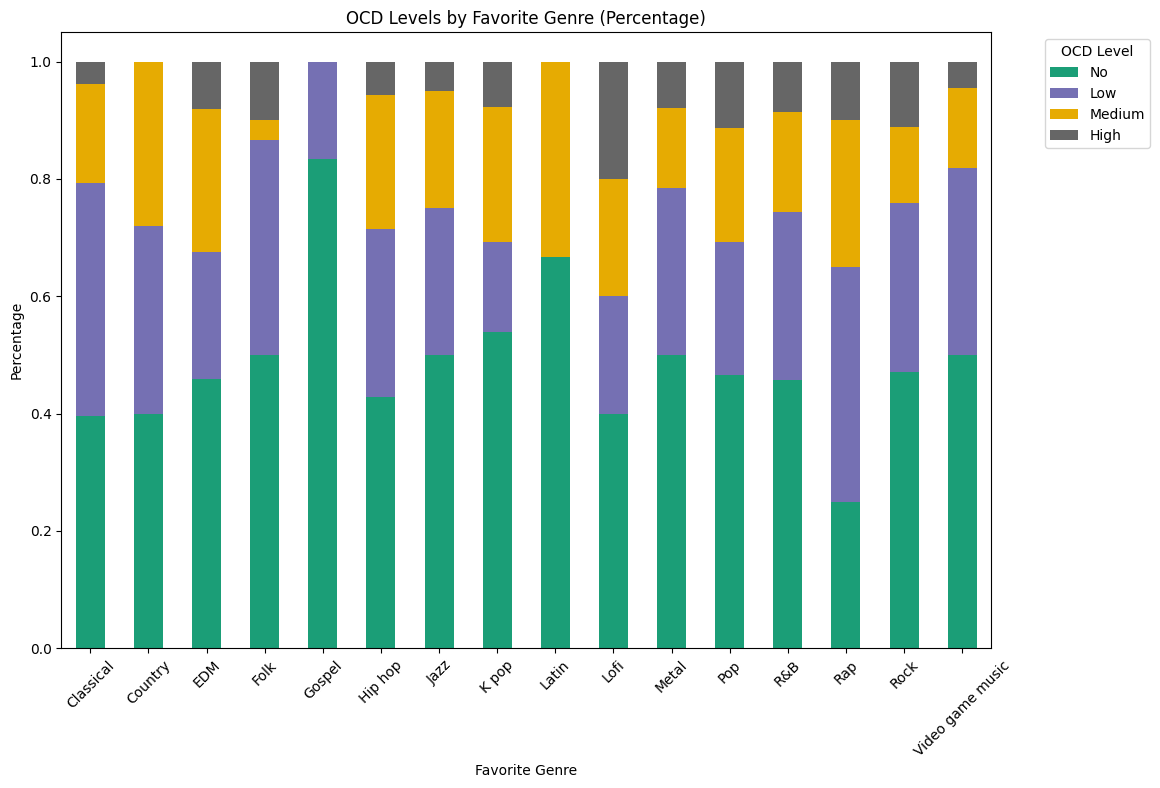

In [26]:
# Set an order for the OCD Groups
OCD_order = ['No', 'Low', 'Medium', 'High']
df['OCD_Group'] = pd.Categorical(df['OCD_Group'], categories=OCD_order, ordered=True)

# Calculate the percentages of each OCD Group
OCD_percentages = df.groupby('Fav_genre')['OCD_Group'].value_counts(normalize=True).unstack()

# Plot the stacked bar chart
OCD_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Dark2')

plt.xlabel('Favorite Genre')
plt.ylabel('Percentage')
plt.title('OCD Levels by Favorite Genre (Percentage)')
plt.xticks(rotation=45)
plt.legend(title='OCD Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Lofi, Rap, and EDM have the highest average OCD levels, while Gospel, Latin, and Folk have the lowest average OCD levels.

From the percentage stacked bar chart, we find that Folk, Gospel, and Video Game Music have the most number of Respondants with No to Low OCD levels, while Lofi, K-pop, and EDM have the fewest.